# Read data

the goal is to explore the images, the csv file, and to get some knwoledge about the complexity of the task

### Packages

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import cv2

import os

libraries:
pandas
matplotlib
cv2 (opencv)
numpy

In [3]:
pd.set_option('display.max_colwidth', None)

### Transformations

In [4]:
my_local_path = os.path.normpath(os.getcwd() + os.sep + os.pardir)

In [5]:
csv_path = my_local_path + "/extract_data/data-interview.csv"

In [6]:
image_id = pd.read_csv(csv_path,sep = ',', error_bad_lines=False)

C:\Users\Miguel\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3442: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 296: expected 2 fields, saw 3\n'


In [7]:
image_id['jpgName'] = image_id.url.str.split('/',0).str[-1]

In [8]:
image_id.sample(n=10)

,url,id,jpgName
425,https://farm1.staticflickr.com/8355/8265517869_6959176954_o.jpg,486473,8265517869_6959176954_o.jpg
382,https://c5.staticflickr.com/9/8390/8562326627_d83c4c783f_o.jpg,719999,8562326627_d83c4c783f_o.jpg
575,https://c3.staticflickr.com/6/5538/9989788116_d3fe0418f5_o.jpg,64675,9989788116_d3fe0418f5_o.jpg
343,https://c1.staticflickr.com/4/3307/3195432512_e4d3cc5a6a_o.jpg,391413,3195432512_e4d3cc5a6a_o.jpg
441,https://c7.staticflickr.com/1/224/502818931_71e37aa096_o.jpg,466905,502818931_71e37aa096_o.jpg
338,https://farm7.staticflickr.com/2340/2251302126_71a013e9b7_o.jpg,166577,2251302126_71a013e9b7_o.jpg
370,https://farm4.staticflickr.com/3231/2370036280_12e625bf70_o.jpg,376391,2370036280_12e625bf70_o.jpg
396,https://c4.staticflickr.com/9/8119/10266082085_3dec6032e1_o.jpg,24721,10266082085_3dec6032e1_o.jpg
56,https://farm7.staticflickr.com/4102/4831175934_e63b28fcaf_o.jpg,359400,4831175934_e63b28fcaf_o.jpg
347,https://c5.staticflickr.com/1/136/342659307_d5d9d36af5_o.jpg,182142,342659307_d5d9d36af5_o.jpg


In [9]:
len(image_id), len(image_id.jpgName.unique()) 

(589, 295)

aja! image duplicates?

In [14]:
image_id.groupby('jpgName', as_index = False).agg(count = ('id','count')).sort_values('count',ascending = True)

,jpgName,count
101,2814480856_58f6012cc0_o.jpg,1
0,10002073854_53dc1acd33_o.jpg,2
199,5403700857_0c66a94e1a_o.jpg,2
198,540101322_80e772086a_o.jpg,2
197,5397534110_c019cc7935_o.jpg,2
...,...,...
95,2759819694_29b9334eea_o.jpg,2
94,26078766_af93f14c7b_o.jpg,2
93,2597157785_5400e95baf_o.jpg,2
110,303217440_f595f9b310_o.jpg,2


In [15]:
image_id[image_id.jpgName == '2814480856_58f6012cc0_o.jpg']

,url,id,jpgName
588,https://farm6.staticflickr.com/3016/2814480856_58f6012cc0_o.jpg,88162,2814480856_58f6012cc0_o.jpg


In [16]:
image_id[image_id.jpgName == '9989788116_d3fe0418f5_o.jpg']

,url,id,jpgName
281,https://c3.staticflickr.com/6/5538/9989788116_d3fe0418f5_o.jpg,64675,9989788116_d3fe0418f5_o.jpg
575,https://c3.staticflickr.com/6/5538/9989788116_d3fe0418f5_o.jpg,64675,9989788116_d3fe0418f5_o.jpg


In [21]:
random_image = image_id.iloc[281,:].jpgName
img1 = cv2.imread(my_local_path + '/images/' + random_image)

random_image = image_id.iloc[575,:].jpgName
img2 = cv2.imread(my_local_path + '/images/' + random_image)

print(img1.shape, img2.shape)

(1000, 635, 3) (1000, 635, 3)


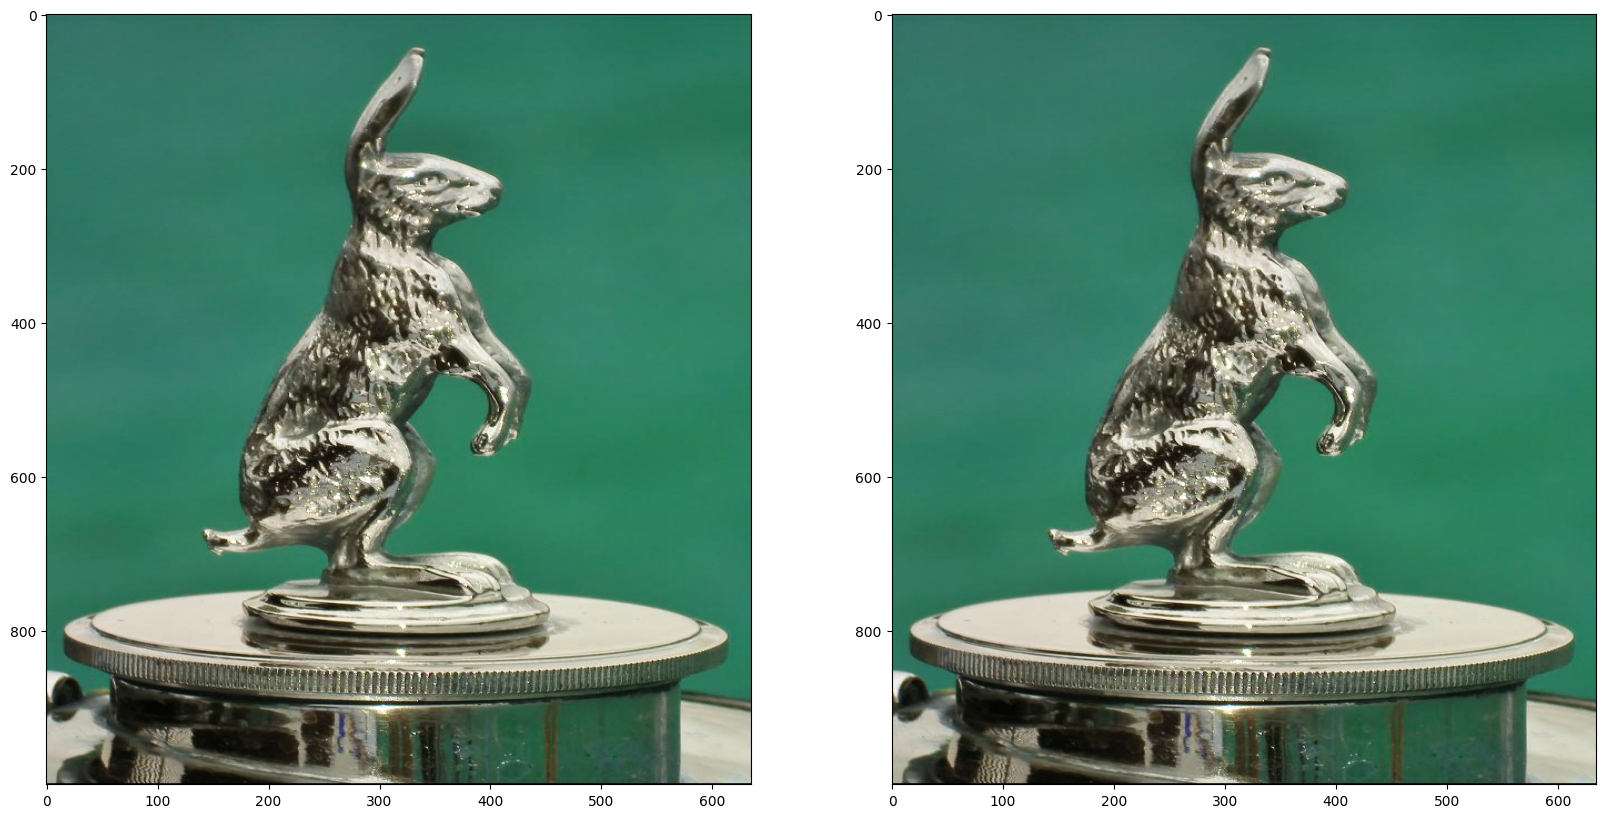

In [22]:
fig,axes  = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

axes[0].imshow(img1,aspect='auto')
axes[1].imshow(img2,aspect='auto')

In [33]:
image_id.groupby(['url','id'], as_index = False).agg(count = ('id','count')).sort_values('count',ascending = True)

,url,id,count
251,https://farm6.staticflickr.com/3016/2814480856_58f6012cc0_o.jpg,88162,1
0,https://c1.staticflickr.com/1/1/359504_987ba125a3_o.jpg,163796,2
198,https://farm2.staticflickr.com/8750/16779609830_1669a8aea3_o.jpg,136467,2
197,https://farm2.staticflickr.com/8698/17006894309_1e9959405e_o.jpg,687954,2
196,https://farm2.staticflickr.com/5333/9220842670_df40013b65_o.jpg,125510,2
...,...,...,...
95,https://c5.staticflickr.com/4/3141/2580484247_c6623e24bf_o.jpg,179065,2
94,https://c5.staticflickr.com/3/2397/2467431240_2f16bb353e_o.jpg,223374,2
93,https://c5.staticflickr.com/2/1065/1387781960_b1d426af3f_o.jpg,452884,2
109,https://c5.staticflickr.com/9/8390/8562326627_d83c4c783f_o.jpg,719999,2


some takeaways up to here:
* duplicates where found in the csv - be carefull with the csv
* last secion of the url seems to be the image name
* at the first glance no labels of similar images - (difficulty to apply supervised method)
* images are:
    * very diverse
    * complex in excence meaning that the can have one or diverse objects, colors, patterns, context, etc

* given that, it seems an unsupervised approch will be a (quick) solution
* also dimension are different, similar dimension is required **** 

applying reshape

In [24]:
width = 1000
height = 1000 # keep original height
dim = (width, height)

In [25]:

random_image = image_id.sample(n=1).jpgName.values[0]
imgt = cv2.imread(my_local_path + '/images/' + random_image)

random_image = image_id.sample(n=1).jpgName.values[0]
img1 = cv2.imread(my_local_path + '/images/' + random_image)

random_image = image_id.sample(n=1).jpgName.values[0]
img2 = cv2.imread(my_local_path + '/images/' + random_image)

random_image = image_id.sample(n=1).jpgName.values[0]
img3 = cv2.imread(my_local_path + '/images/' + random_image)

print('previous shapes')
print(imgt.shape, img1.shape, img2.shape, img3.shape,)

imgt = cv2.resize(imgt, dim, interpolation = cv2.INTER_AREA)
img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
img2 = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)
img3 = cv2.resize(img3, dim, interpolation = cv2.INTER_AREA)

print('new shapes')
print(imgt.shape, img1.shape, img2.shape, img3.shape,)

previous shapes
(2621, 1200, 3) (375, 500, 3) (2010, 2217, 3) (500, 500, 3)
new shapes
(1000, 1000, 3) (1000, 1000, 3) (1000, 1000, 3) (1000, 1000, 3)


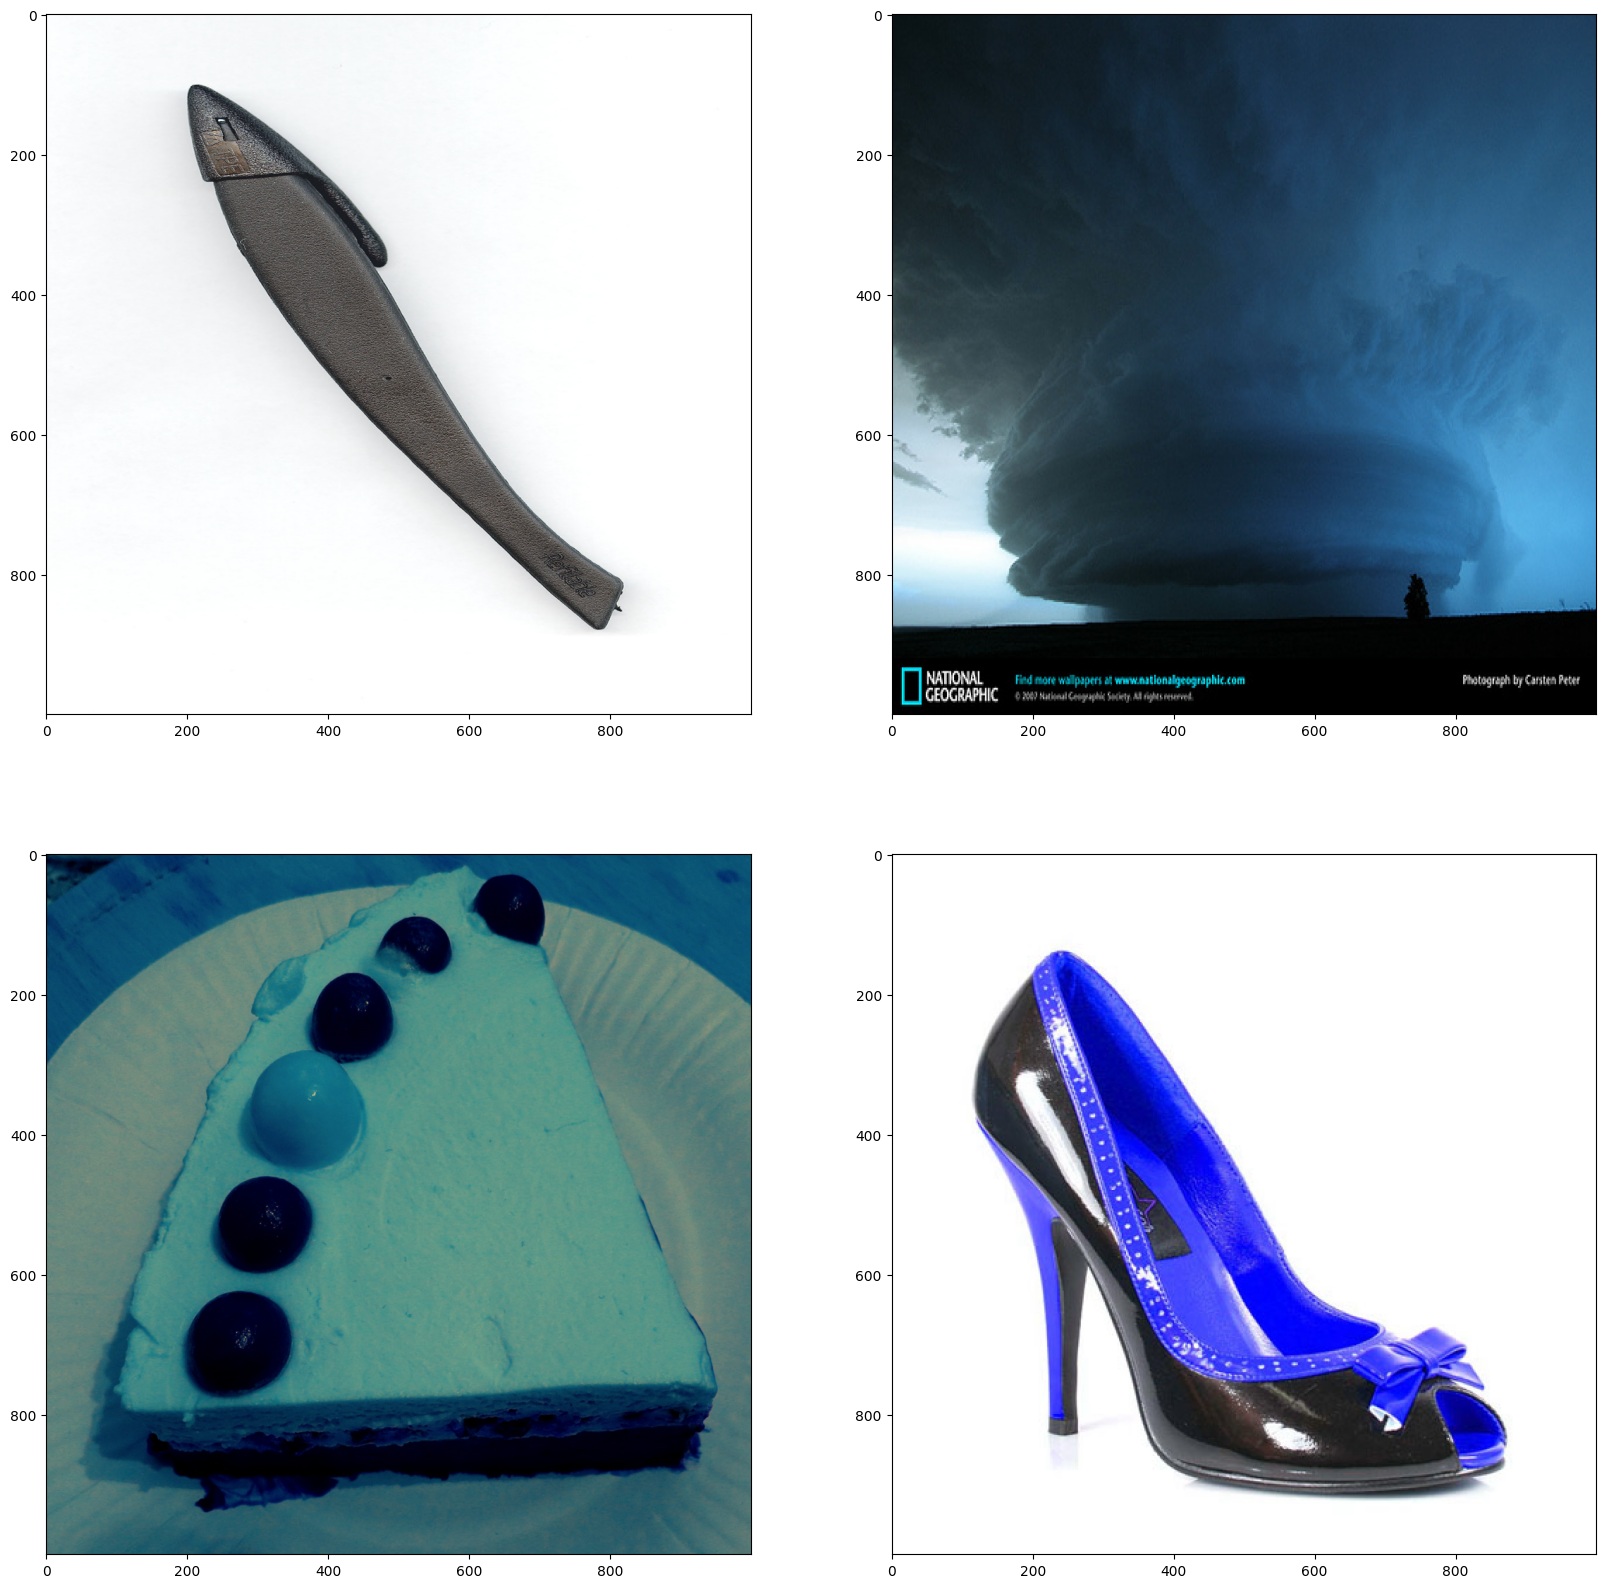

In [26]:
fig,axes  = plt.subplots(nrows=2, ncols=2,figsize=(20,20))

axes[0,0].imshow(imgt,aspect='auto')
axes[0,1].imshow(img1,aspect='auto')
axes[1,0].imshow(img2,aspect='auto')
axes[1,1].imshow(img3,aspect='auto')


In [27]:
def mse(img1, img2):
   
    img1_ = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_ = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    h, w = img1_.shape
    diff = cv2.subtract(img1_, img2_)
    err = np.sum(diff**2)
    mse = err/(float(h*w))
    return mse

In [28]:
error = mse(imgt, img1)
print(error)

96.66722


In [29]:
error = mse(imgt, img2)
print(error)

89.219789


In [30]:
error = mse(imgt, img3)
print(error)

24.752183


some takeaways up to here:
* using opencv to exploit numerically the images
* using a simple distance metric mse, possibility to compare images
* dataset with more than 290 images
* further explo about how to
    * reduce dimensionality of images -> less space + higher execution time
    * better similarity/distance metric

### Saving Results

In [37]:
data_int_no_dup = image_id.groupby(['url','id'], as_index = False).agg(count = ('id','count')).sort_values('count',ascending = True)
data_int_no_dup['jpgName'] = data_int_no_dup.url.str.split('/',0).str[-1]
data_int_no_dup = data_int_no_dup.drop(columns = ['count'])

In [38]:
data_int_no_dup.to_csv(my_local_path + "/extract_data/data-interview-clean.csv", index = False, header = True)